In [620]:
from math import *
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [621]:
mu, k = 3, 45

In [622]:
kp, kd = 1000, 200

In [623]:
#no control
def damped_osc(x,t):
    return np.array([-mu*x[0] -k*x[1], x[0]])

In [624]:
x0 = np.random.rand(2)
time = np.linspace(0, 10, 1000)

In [625]:
solution_wo_c = {"damped oscillator": odeint(damped_osc, x0, time)}

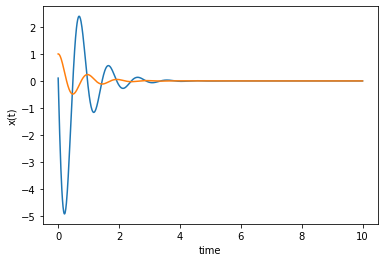

In [626]:
#plot without control
plt.subplot(1, 1, 1)
plt.plot(time, solution_wo_c["damped oscillator"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

In [627]:
#using control
def controlled_damped_osc(x,t):
    x_desired = 5*t
    #x_desired = 2sin(2*t)
    x_dot_desired = 5
    #x_dot_desired = 4cos(2*t)
    
    error = x_desired - x[1]
    error_dot = x_dot_desired - x[0]
    
    u = kp* error + kd * error_dot
    return np.array([u -mu*x[0] -k*x[1], x[0]])

In [628]:
solution_w_c = {"controlled damped oscillator": odeint(controlled_damped_osc, x0, time)}

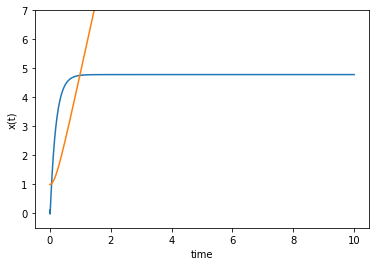

In [629]:
#plot with control
plt.subplot(1, 1, 1)
plt.ylim(-.5, 7)
plt.plot(time, solution_w_c["controlled damped oscillator"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()